#### DS 3000 - Assignment [4]

**Student Name**: [Brian Wong]

**Date**: [1/30/2025]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

(0 pts) Load the data directly from the url into a dataframe. Here is the link to the data:
https://drive.google.com/uc?export=download&id=1aWQsq0fdL3SF-jyrVMpEAtHW9FFSF2xO

In [3]:
import pandas as pd

In [4]:
# loads the data directly from the url into a dataframe
chemDep_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1aWQsq0fdL3SF-jyrVMpEAtHW9FFSF2xO")
chemDep_df.head()

,Year,County of Program Location,Program Category,Service Type,Age Group,Primary Substance Group,Admissions
0,2007,Albany,Crisis,Medical Managed Detoxification,Under 18,Heroin,4
1,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,All Others,2
2,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Other Opioids,6
3,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Heroin,132
4,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Alcohol,35


## Question 2: 
(5 pts) Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed) and perform at least one additional data preparation step. 

In [6]:
# checking if all variables are represented in their expected type
chemDep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99367 entries, 0 to 99366
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        99367 non-null  int64 
 1   County of Program Location  99367 non-null  object
 2   Program Category            99367 non-null  object
 3   Service Type                99367 non-null  object
 4   Age Group                   99367 non-null  object
 5   Primary Substance Group     99366 non-null  object
 6   Admissions                  99367 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


Based on the information above, the variables 'County of Program Location', 'Program Category', 'Service Type', 'Age Group', and 'Primary Substance Group' are not represented in their expected type.

In [8]:
# convert variables to suitable data types
chemDep_df['County of Program Location'] = chemDep_df['County of Program Location'].astype('string')
chemDep_df['Program Category'] = chemDep_df['Program Category'].astype('category')
chemDep_df['Service Type'] = chemDep_df['Service Type'].astype('category')
chemDep_df['Age Group'] = chemDep_df['Age Group'].astype('category')
chemDep_df['Primary Substance Group'] = chemDep_df['Primary Substance Group'].astype('category')

In [9]:
# Checking if any columns has missing values
chemDep_df.isnull().sum()

Year                          0
County of Program Location    0
Program Category              0
Service Type                  0
Age Group                     0
Primary Substance Group       1
Admissions                    0
dtype: int64

In [10]:
# Finding the mode of this categorical variable
chemDep_df['Primary Substance Group'].value_counts(dropna=False)

Primary Substance Group
Alcohol          19985
Heroin           19430
Other Opioids    16781
Cocaine          16278
Marijuana        14069
All Others       12823
NaN                  1
Name: count, dtype: int64

In [11]:
# Additional data prep step: Using imputation to replace missing value with mode since isolated issue.
chemDep_df.loc[chemDep_df['Primary Substance Group'].isna(), 'Primary Substance Group'] = 'Alcohol' 

## Question 3: 
(10 pts) Visualize the distribution of Age Groups, Program Category, Primary Substance Group, and Admissions. Ensure that you 1) choose an appropriate graph based on the type of data, and 2) use the appropriate function to aggregate the data. Explain each chart.

In [13]:
import matplotlib.pyplot as plt

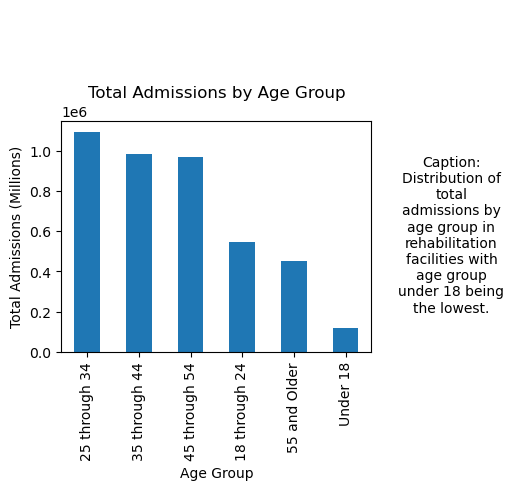

In [14]:
# Aggregate data about relationship between Age Group and Admissions using sum function
age_group_admissions = chemDep_df.groupby('Age Group', observed=False)['Admissions'].sum()

# Sort the data in descending order (from highest to lowest)
age_group_admissions = age_group_admissions.sort_values(ascending=False)

# Create a figure and axis for the plot
plt.figure(figsize=(4, 3))

# Plot the bar chart
age_group_admissions.plot(kind='bar', title="Total Admissions by Age Group")

# Add labels and title
plt.xlabel("Age Group")
plt.ylabel("Total Admissions (Millions)")

# Caption for the graph
plt.figtext(1.1, 0.25, "Caption: Distribution of total admissions by age group in rehabilitation facilities with age group"
            + " under 18 being the lowest.", 
            wrap=True, horizontalalignment='center', fontsize=10)

# Display the plot
plt.show()

In the bar graph labeled "Total Admissions by Age Group," the x-axis represents the age groups, and the y-axis represents the total admissions. Based on the bar graph, the age group 25 through 34 has the highest total admissions at over 1 millions total admissions. The graph then dips by about 100,000 where the second and third age groups--35 through 44 and 45 through 54--have nearly the same amount of total admissions at about 1 million. The fourth highest total admissions age group is 18 through 24 at about 550,000 total admissions which is a significant drop in total admissions compared to the third highest total admissions age group. The fifth highest total admissions age group is 55 and older, which is slightly lower than the fourth highest total admissions, at 500,000 total admissions. The lowest age group is under 18 and it has the lowest total admissions at about 100,000. Overall, this distribution shows that admissions are highest for adults in their late 20s to early 50s, with a sharp decline in admissions for younger and older age groups.

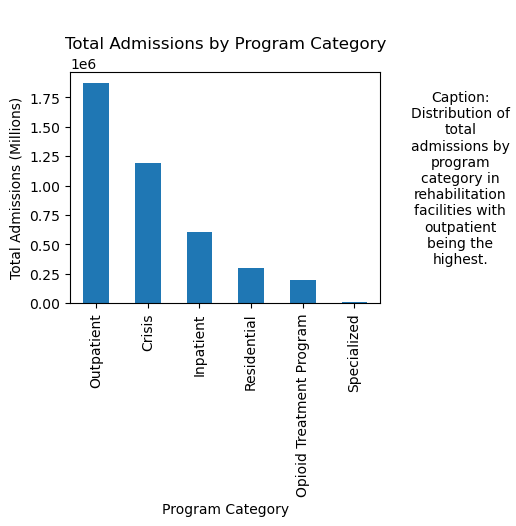

In [16]:
# Aggregate data about relationship between Program Category and Admissions using sum function
program_category_admissions = chemDep_df.groupby('Program Category', observed=False)['Admissions'].sum()

# Sort the data in descending order (from highest to lowest)
program_category_admissions = program_category_admissions.sort_values(ascending=False)

# Create a figure and axis for the plot
plt.figure(figsize=(4, 3))

# Plot the bar chart
program_category_admissions.plot(kind='bar', title="Total Admissions by Program Category")
    
# Add labels and title
plt.xlabel("Program Category")
plt.ylabel("Total Admissions (Millions)")

# Caption for the graph
plt.figtext(1.1, 0.25, "Caption: Distribution of total admissions by program category in rehabilitation facilities with outpatient"
            + " being the highest.", 
            wrap=True, horizontalalignment='center', fontsize=10)

# Display the plot
plt.show()

In the bar graph labeled "Total Admissions by Program Category," the x-axis represents the program category and the y-axis represents the total admissions in millions. Based on the bar graph, the program category with the highest total admissions is outpatient at about 1.87 million total admissions. There is then a significant drop in total admissions for the second highest total admission program category, which is crisis at nearly 1.25 million total admissions, so a drop of about 0.62 million. There is also another significant drop in total admissions to go from the second highest total admission program category to the third highest, which is inpatient at about 0.6 million total admissions, so a similar drop from the highest to second highest total admission program category. The fourth highest total admission is residential at about 0.3 million total admissions, which is a drop of about 0.3 million from the third highest total admission. The fifth highest total admission is opiod treatment program at about 0.25 million total admissions, which is a slight drop in total admission from the fourth highest total admission. The lowest total admission for program category is specialized which is nearly zero total admission, but slightly more. Overall, the general trend shows that outpatient programs are the most popular, and there is a steep decline in admissions for the other categories.

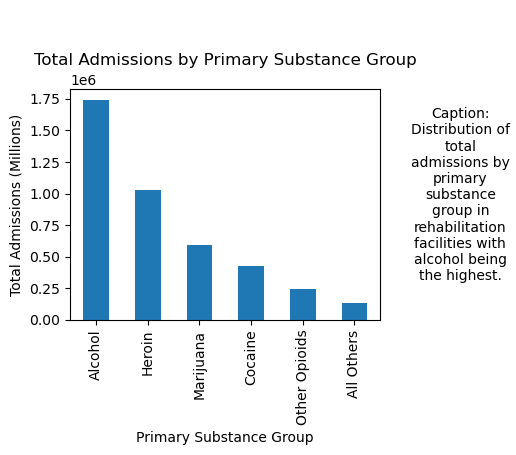

In [18]:
# Aggregate data about relationship between Primary Substance Group and Admissions using sum function
substance_group_admissions = chemDep_df.groupby('Primary Substance Group', observed=False)['Admissions'].sum()

# Sort the data in descending order (from highest to lowest)
substance_group_admissions = substance_group_admissions.sort_values(ascending=False)

# Create a figure and axis for the plot
plt.figure(figsize=(4, 3))

# Plot the bar chart
substance_group_admissions.plot(kind='bar', title="Total Admissions by Primary Substance Group")
    
# Add labels and title
plt.xlabel("Primary Substance Group")
plt.ylabel("Total Admissions (Millions)")

# Caption for the graph
plt.figtext(1.1, 0.25, "Caption: Distribution of total admissions by primary substance group in rehabilitation facilities"
            + " with alcohol being the highest.", 
            wrap=True, horizontalalignment='center', fontsize=10)

# Display the plot
plt.show()

In the bar graph labeled "Total Admissions by Primary Substance Group," the x-axis represents the different primary substance groups, and the y-axis represents the total admissions in millions. Based on the bar graph, the highest total admissions primary substance group is alcohol at about 1.75 million total admissions. There is then a significant drop to get to the second highest total admission, which is heroin at about 1 million total admissions, so a drop of about 0.75 million total admissions. There is then a slightly less signficant drop to get from the second to third highest total admission, which is marijuana at about 0.6 million total admissions, so a drop of about 0.4 million total admissions. The next most total admissions, which has slightly smaller drops, are cocaine at about 0.4 million total admission, followed by other opiods at about 0.25 million. The least total admission for primary substance group would be all others at about 0.125 million total admissions. Overall, the general trend indicates that alcohol has the highest demand, followed by heroin and marijuana, with the other substances contributing much less to total admissions.

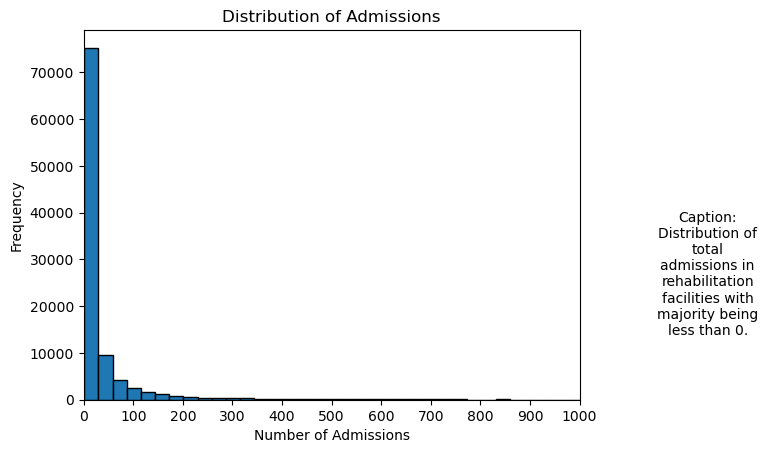

In [20]:
plt.hist(chemDep_df['Admissions'], bins=100, edgecolor='black')
plt.title("Distribution of Admissions")
plt.xlabel("Number of Admissions")
plt.ylabel("Frequency")
plt.xlim(0, 1000)
plt.xticks(range(0, 1001, 100))

# Caption for the graph
plt.figtext(1.1, 0.25, "Caption: Distribution of total admissions in rehabilitation facilities with majority being less than 0.", 
            wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

In the histogram titled "Distribution of Admissions," the x-axis represents the number of admissions, and the y-axis represents the frequency. We can see that the number of admissions between 0 and 100 has the highest frequency, indicating that the majority of cases have a low number of admissions. We can also see that the distribution of the histogram is skewed right, which means that although most cases are less than 100 admissions, there are still some with higher number of admissions. Overall, the distribution is skewed right with most having few admissions (less than 100), and some having significantly more, leading to the tail on the right side of the chart.

## Question 4: 
(5 pts) Develop a function named annualAdmissions(). This function will calculate the total reported admissions each year across the entire state of New York. Subsequently, display the results using a line chart and annotate the chart to indicate the year with the highest number of admissions.
After which, Execute the function in a new cell. Explain the chart and discuss any patterns or trends that you have observed.

In [23]:
# Function to calculate and plot total admissions by year for New York as line chart
def annualAdmissions():
    # Filter the dataset to only include New York county
    ny_data = chemDep_df[chemDep_df['County of Program Location'] == 'New York']

    # Aggregate total admissions by year
    yearly_admissions = ny_data.groupby('Year')['Admissions'].sum()

    # Plot the line chart
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_admissions.index, yearly_admissions.values, marker='o', color='b', linestyle='-', linewidth=2)
    plt.title("Annual Admissions in State of New York", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Total Admissions", fontsize=12)

    # Find the year with the highest admissions
    max_year = yearly_admissions.idxmax()
    max_value = yearly_admissions.max()

    # Caption for the graph
    plt.figtext(1, 0.25, "Caption: Annual admissions to rehabilitation facilities in the state of New York with 2007 being the highest year for"
                + " admissions.", 
            wrap=True, horizontalalignment='center', fontsize=10)

    # Annotate with red dot at the highest value
    plt.scatter(max_year, max_value, color='red', zorder=5)  # Red dot for highest value
    
    # Fabel for the red dot
    plt.text(max_year + 0.5, max_value + 100, f'Highest: ({max_year}, {max_value})', 
             ha='left', fontsize=12, color='black')

    # Add legend
    plt.legend(["Total Admissions", "Highest Admission Year (Red Dot)"], loc="upper right")

    # Display the chart
    plt.grid(True)
    plt.show()

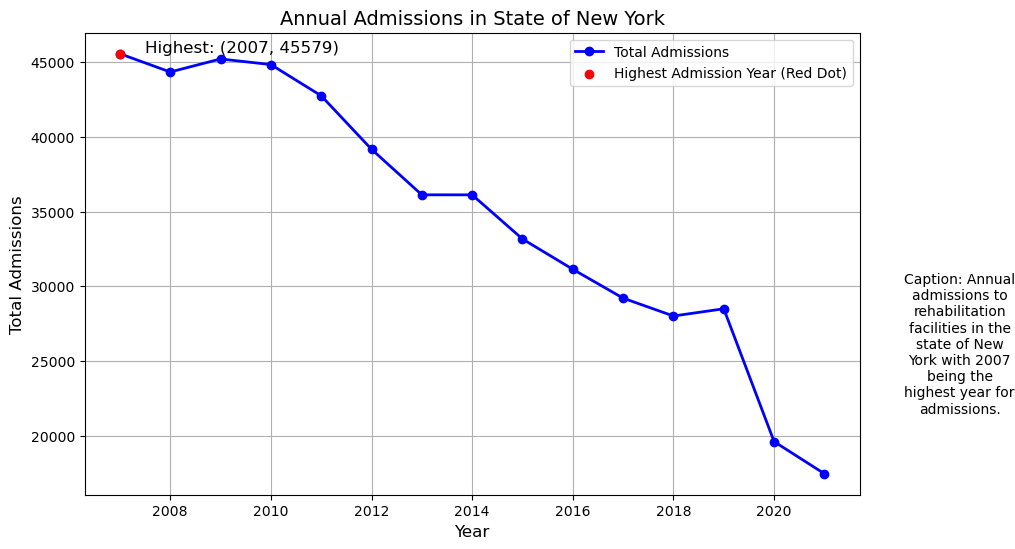

In [24]:
# execute annualAdmissions
annualAdmissions()

In the line chart labeled "Annual Admissions in State of New York," the x-axis represents the Year and the y-axis represents the total admissions. The year with the highest number of admissions is labeled by a red dot and it is at the year 2007 with 45,579 total admissions. The general trend shown based on this line chart is that as the number of years increases, the total admissions generally decrease. Some years don't follow this general trend, such as between 2008-2009 where total admissions increased, between 2013-2014 where total admissions seemed to stay the same, and between 2018-2019 where there was a slight increase in total admissions.

## Question 5: 
(10 pts) Develop a function named annualAdmissionsByCounty(year). This function will take a year as input, filter the data to identify all admissions for that specific year, and calculate the proportion of admissions by county. For instance, if the year is 2007, the function should filter the data for the specific year and compute the admissions as follows: county A 75%, county B 20%, and county C 2.5%, etc. The results should be displayed using a bar chart that highlights the top 10 counties.
Execute the annualAdmissionsByCounty() function in a new code cell to visualize the data for the last 10 years within the data.
Analyze the results and discuss any patterns or trends observed over this period.

In [27]:
# Function to calculate the proportion of admissions by county in specified year
# and plots top 10 counties with highest proportion of admissions by county as bar chart
def annualAdmissionsByCounty(year):
    # filter data to identify all admissions for that specific year
    yearly_data = chemDep_df[chemDep_df['Year'] == year]

    # Group by county and sum admissions
    county_admissions = yearly_data.groupby('County of Program Location')['Admissions'].sum()

    # Calculate proportions
    total_admissions = county_admissions.sum()
    county_proportions = (county_admissions / total_admissions) * 100

    # Sort and select top 10 counties
    top_10_counties = county_proportions.nlargest(10)

    # Plot the bar chart
    plt.figure(figsize=(5, 5))
    top_10_counties.plot(kind='bar', color='blue', edgecolor='black')
    plt.title(f"Top 10 Counties by Admission Proportion in {year}", fontsize=14)
    plt.xlabel("County", fontsize=12)
    plt.ylabel("Percentage of Total Admissions (%)", fontsize=12)
    plt.xticks(rotation=45)

    # Caption for the graph
    plt.figtext(1, 0.25, "Caption: Displays the top 10 counties by admission proportion in specified the year.", 
            wrap=True, horizontalalignment='center', fontsize=10)
    
    plt.show()

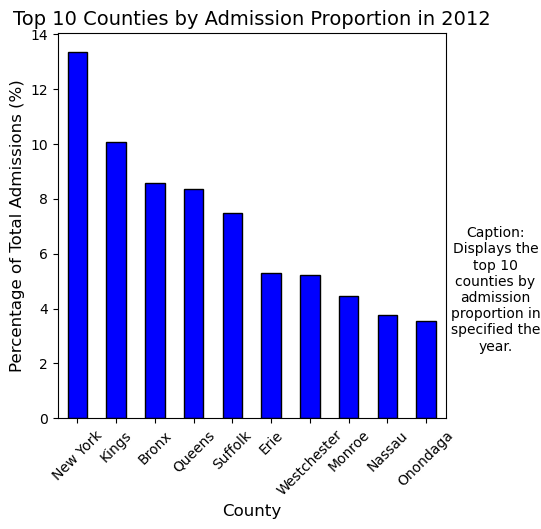

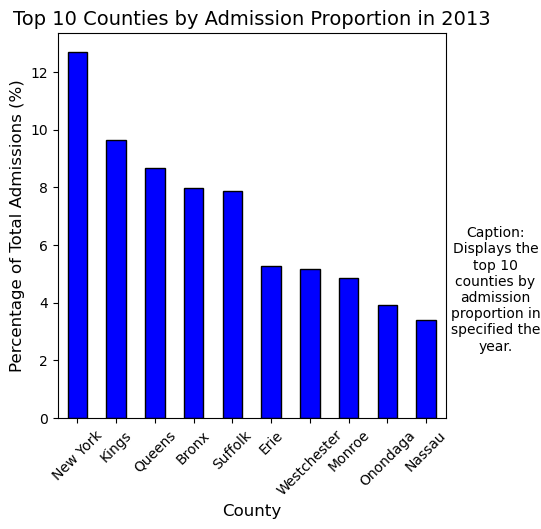

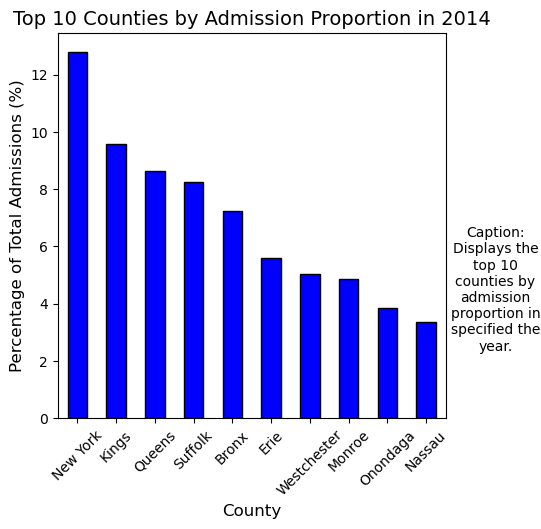

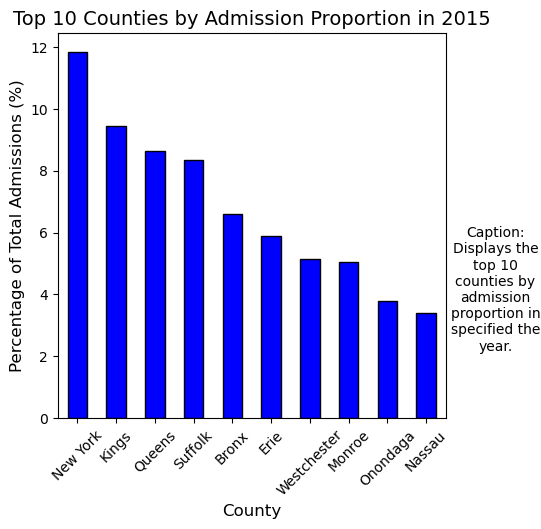

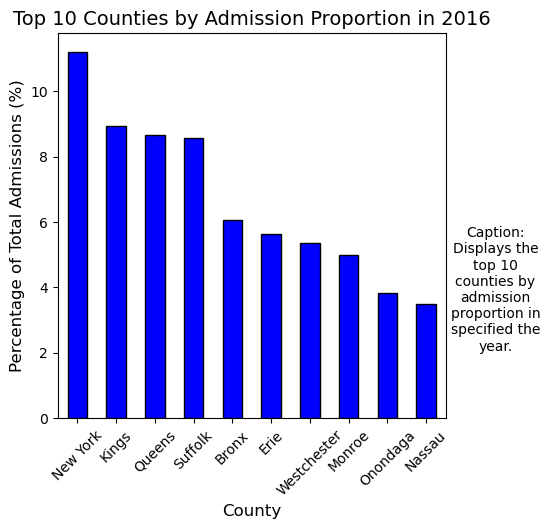

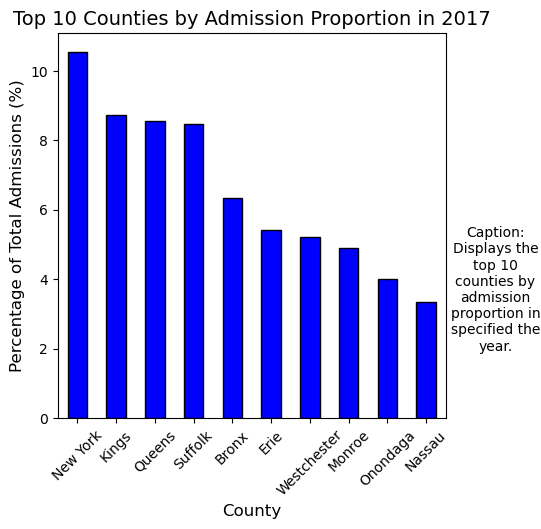

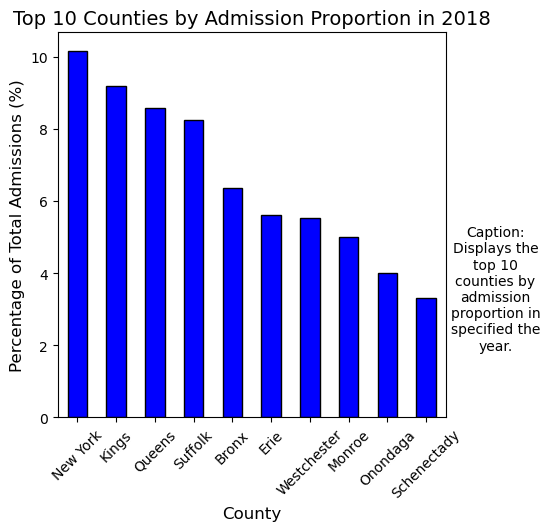

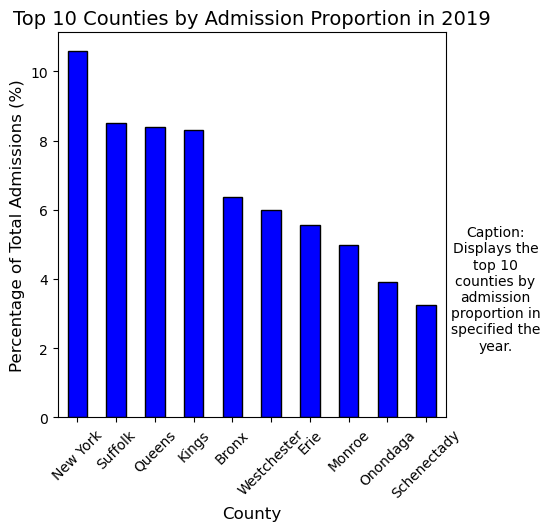

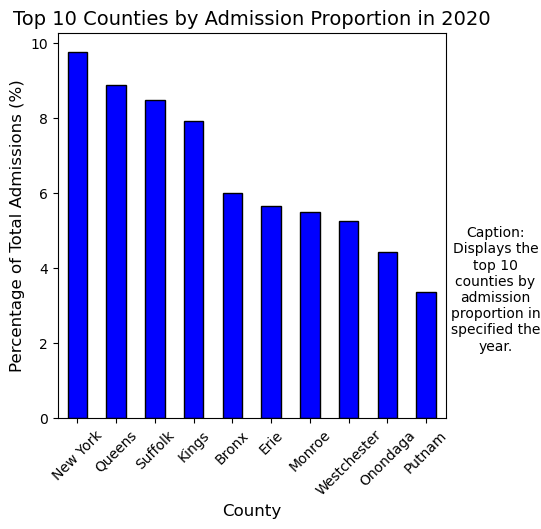

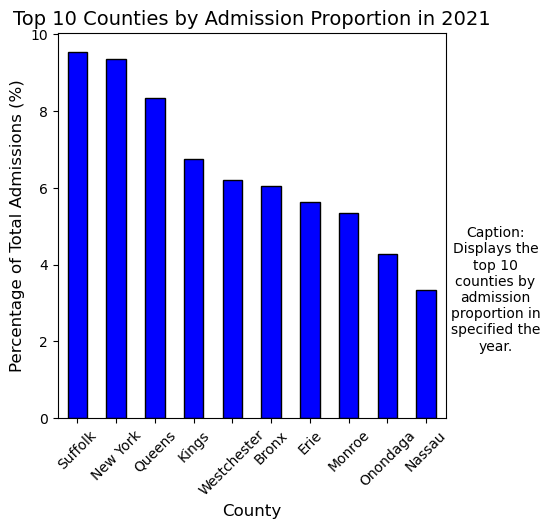

In [28]:
# Execute the function for the last 10 years within the dataset
last_10_years = sorted(chemDep_df['Year'].unique())[-10:]
for y in last_10_years:
    annualAdmissionsByCounty(y)

The years displayed in the graphs are from 2012-2021.Looking at each of the county with the highest percentage of total admissions, as the number of years increase, the percentage of total admissions for the highest county in each of the year generally decreases: At 2012, the highest percentage was about 13%, but as the years went on, the highest percentage tended to decrease to the point where at 2021, the highest percentage was about 9%. Another pattern I noticed was that New York is generally the county with the highest percentage of total admission and it was the county with the highest percentage for 9 out of the 10 years between 2012-2021. Another pattern I saw was that the county with the sixth highest percentage of total admission is generally around 5%-6%, while the county with the tenth highest percentage of total admission is generally around 3%-4%.  

## Question 6: 
(10 pts) Filter the data, and extract all admissions to the various “Rehab” facilities; i.e. you should perform a case-insensitive match for all facilities that include the word rehab, rehabilitation, etc. Using the filtered data, identify which substance is the most prominent among each age group. Visualize and explain the results.

In [31]:
# Filter the data, and extract all admissions to the various "Rehab" facilities
rehab_keywords = ['rehab', 'rehabilitation']
rehab_data = chemDep_df[chemDep_df['Service Type'].str.contains('|'.join(rehab_keywords), case=False, na=False)]

# Display the first few rows of the filtered data to verify
print(rehab_data.head())

    Year County of Program Location Program Category  \
48  2007                     Albany        Inpatient   
49  2007                     Albany        Inpatient   
50  2007                     Albany        Inpatient   
51  2007                     Albany        Inpatient   
52  2007                     Albany        Inpatient   

                Service Type      Age Group Primary Substance Group  \
48  Inpatient Rehabilitation  18 through 24              All Others   
49  Inpatient Rehabilitation  18 through 24                 Cocaine   
50  Inpatient Rehabilitation  18 through 24               Marijuana   
51  Inpatient Rehabilitation  18 through 24           Other Opioids   
52  Inpatient Rehabilitation  18 through 24                  Heroin   

    Admissions  
48           2  
49          25  
50          33  
51           2  
52          16  


In [32]:
# Calculate total admissions based on age group and primary substance group
grouped_data = rehab_data.groupby(['Age Group', 'Primary Substance Group'], observed=False)['Admissions'].sum().reset_index()

# Identify the most prominent substance for each age group
most_prominent_substance = grouped_data.loc[grouped_data.groupby('Age Group', observed=False)['Admissions'].idxmax()]

# Display the most prominent substances for each age group
print(most_prominent_substance)

        Age Group Primary Substance Group  Admissions
3   18 through 24                  Heroin       31583
9   25 through 34                  Heroin       67720
12  35 through 44                 Alcohol       78199
18  45 through 54                 Alcohol      104903
24   55 and Older                 Alcohol       56801
34       Under 18               Marijuana       14118


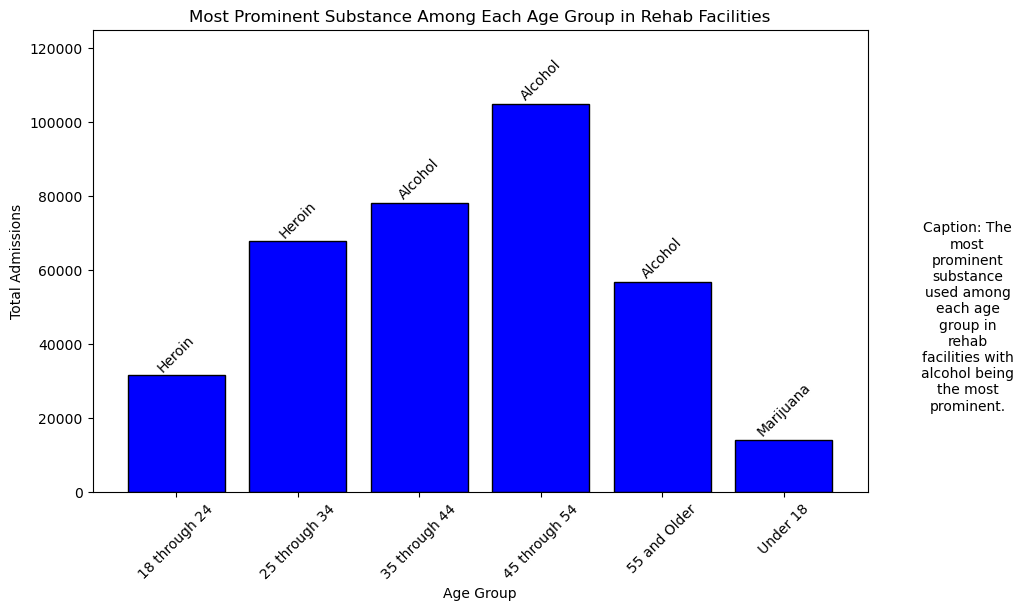

In [33]:
# Visualize the data
plt.figure(figsize=(10, 6))
bars = plt.bar(most_prominent_substance['Age Group'], most_prominent_substance['Admissions'],
               color='blue', edgecolor='black')

# Annotate bars with the corresponding substance
for index, row in most_prominent_substance.iterrows():
    plt.text(row['Age Group'], row['Admissions'] + 1000, row['Primary Substance Group'],
             ha='center', fontsize=10, rotation=45)

# Labels and title
plt.xlabel('Age Group')
plt.ylabel('Total Admissions')
plt.title('Most Prominent Substance Among Each Age Group in Rehab Facilities')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Extend the y-axis to add more space
plt.ylim(0, most_prominent_substance['Admissions'].max() + 20000)

# Caption for the graph
plt.figtext(1, 0.25, "Caption: The most prominent substance used among each age group in rehab facilities with alcohol being the most prominent.", 
            wrap=True, horizontalalignment='center', fontsize=10)

# Show the plot
plt.show()

In the bar chart labeled "Most Prominent Substance Among Each Age Group in Rehab Facilities," the x-axis represents the age groups, and the y-axis represents the total admissions. Based on the bar chart, the substance affecting the most age groups is alcohol where it is the most prominent substance among 3 out of the 6 age groups. This is followed by heroin, which affects two out of the six total age groups, and marijuana which affects only one out of the six age groups. The substance that affects the age groups with the two highest total admissions is alcohol, affecting age groups 45 through 54 and age group 35 through 44. This chart also shows that people in ages between 25-54 have the highest total admissions for people at rehab facilities compared to people 55 and older and people under 24. Something in common between these two groups of age group, 25-54 vs. 55+ or under 24, is that alcohol and heroin affects both these groups of age group.

## Question 7: 
(10 pts) Using the filtered “rehab” data from Question 6, conduct a detailed analysis to identify patterns in admissions to rehabilitation facilities across 7 counties. For example, are admissions for certain substance groups more prevalent etc. Provide a comprehensive explanation of your observations with supporting visualizations.

In [36]:
# Aggregate admissions by county
top_counties = rehab_data.groupby('County of Program Location')['Admissions'].sum()

# Get the top 7 counties
top_7_counties = top_counties.sort_values(ascending=False).head(7)
print(top_7_counties)

County of Program Location
Suffolk        83928
Westchester    71078
Putnam         55458
Schenectady    51509
Queens         43335
New York       43118
Kings          40712
Name: Admissions, dtype: int64


In [37]:
# Filter data for the top 7 counties
top_county_data = rehab_data[rehab_data['County of Program Location'].isin(top_7_counties.index)]

# Group by county and primary substance group, then sum admissions
county_substance_data = top_county_data.groupby(['County of Program Location', 'Primary Substance Group'], observed=False)['Admissions'].sum().reset_index()

# Identify the most common substance in each county
most_common_substance = county_substance_data.loc[county_substance_data.groupby('County of Program Location', observed=False)['Admissions'].idxmax()]
print(most_common_substance)

   County of Program Location Primary Substance Group  Admissions
0                       Kings                 Alcohol       20533
6                    New York                 Alcohol       18365
12                     Putnam                 Alcohol       23361
18                     Queens                 Alcohol       20262
27                Schenectady                  Heroin       17552
30                    Suffolk                 Alcohol       32727
36                Westchester                 Alcohol       30207


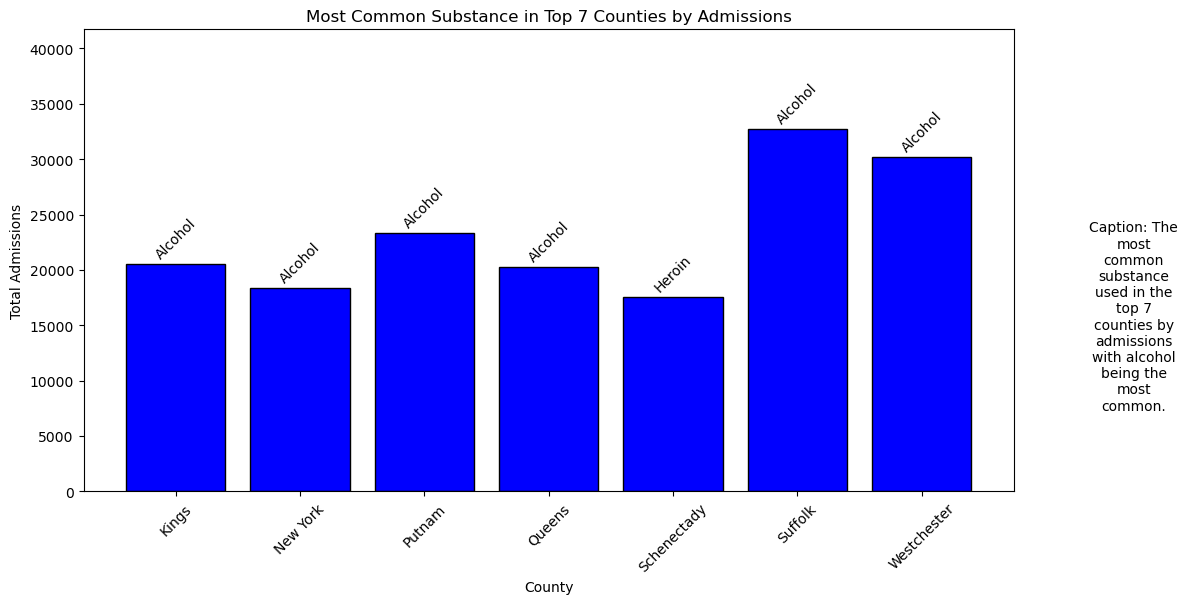

In [38]:
# create visualizations
plt.figure(figsize=(12, 6))
bars = plt.bar(most_common_substance['County of Program Location'], most_common_substance['Admissions'],
               color='blue', edgecolor='black')

# Annotate bars with the corresponding substance
for index, row in most_common_substance.iterrows():
    plt.text(row['County of Program Location'], row['Admissions'] + 500, row['Primary Substance Group'],
             ha='center', fontsize=10, rotation=45)

# Labels and title
plt.xlabel('County')
plt.ylabel('Total Admissions')
plt.title('Most Common Substance in Top 7 Counties by Admissions')

# Rotate x-axis labels for clarity
plt.xticks(rotation=45)

# Extend the y-axis to add more space
plt.ylim(0, most_common_substance['Admissions'].max() + 9000)

# Caption for the graph
plt.figtext(1, 0.25, "Caption: The most common substance used in the top 7 counties by admissions with alcohol being the most common.", 
            wrap=True, horizontalalignment='center', fontsize=10)

# Show the plot
plt.show()

Among the top 7 counties with the highest total admissions, alcohol is the substance that is most prevalent, which is affecting 6 out of the 7 counties with the highest total admission--using the filtered "rehab" data. Additionally, those 6 counties that are affected by alcohol are the counties with the highest total admissions;among these 7 counties, the county with the least total admission is Schenectady, which is affected by heroin. The county with the most toal admissions is Suffolk at about 32,500 total admissions. There is then a slight drop to get to Westchester which is at about 31,000 total admissions. After these two counties, there is a significant drop to get to the county with the third most total admission, which is Putnam at about 24,000 total admissions. After Putnam is the counties Kings and Queens with very similar total admissions at about 21,000 total admissions. After Kings and Queens is the counties New York and Schenectady with very similar total admissions at about 18,000 total admissions.

## Question 8: 
(5 pts)[optional/bonus] Create any (1) visualization of your choice to demonstrate something interesting about the data. Ensure that you explain what you will demonstrate and the results.

I will be demonstrating how the total admission changed per year for the county with the least total admissions.

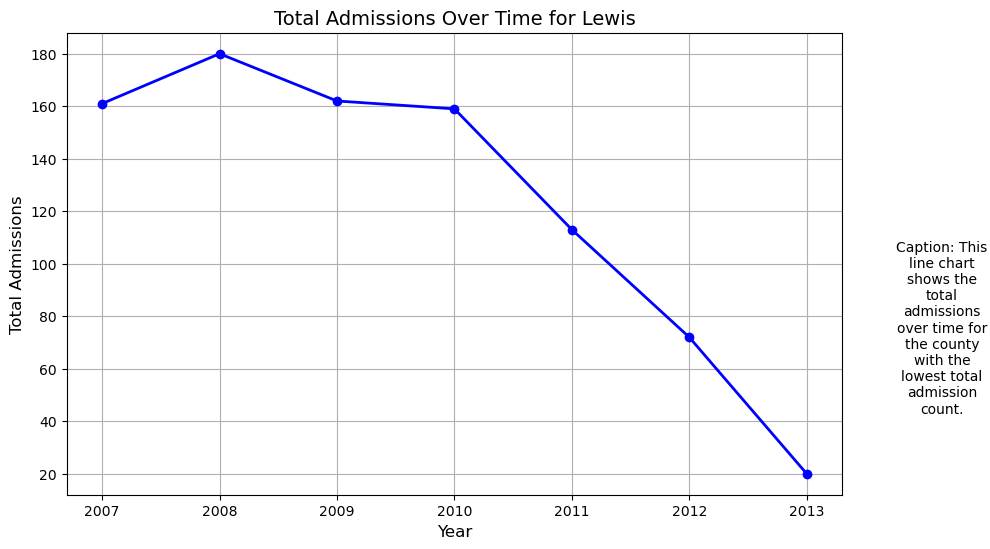

In [42]:
# Group by County and sum the Admissions
county_admissions = chemDep_df.groupby('County of Program Location')['Admissions'].sum()

# Find the county with the least total admissions
least_admissions_county = county_admissions.idxmin()
least_admissions_value = county_admissions.min()

# Filter data for the county with the least admissions
county_data = chemDep_df[chemDep_df['County of Program Location'] == least_admissions_county]

# Aggregate admissions by year for that county
yearly_admissions = county_data.groupby('Year')['Admissions'].sum()

# Step 5: Create the plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_admissions.index, yearly_admissions.values, marker='o', color='b', linestyle='-', linewidth=2)
plt.title(f"Total Admissions Over Time for {least_admissions_county}", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Admissions", fontsize=12)

# Caption for the graph
plt.figtext(1, 0.25, "Caption: This line chart shows the total admissions over time for the county with the lowest total admission count.", 
            wrap=True, horizontalalignment='center', fontsize=10)

# Step 6: Display the plot
plt.grid(True)
plt.show()

In the line chart labeled "Total Admissions Over Time for Lewis," the x-axis represents the year, and the y-axis represents the total admissions. Based on this line chart, the total admissions over time for Lewis changed by decreasing total admissions every year between 2007-2013 except for the years 2007-2008 where total admissions increased. Something interesting about this line chart is that between 2010-2013, the total admissions seem to be decreasing linearly to only about 20 total admissions at 2013. Overall, between 2007-2013, total admissions went from about 160 to about 20, which is a significant drop of 140 total admissions or about 87.5%. 

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
